# Stock Market Prediction using Numerical and Textual Analysis

**(Level - Advanced)**

### Author : Jeenath S,
B.E- Computer Science and Engineering

## Objective: 

Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and
sentimental analysis of news headlines

● Stock to analyze and predict - SENSEX (S&P BSE SENSEX)

● Download historical stock prices from finance.yahoo.com

● Download textual (news) data from https://bit.ly/36fFPI6

In [1]:
## Importing Librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr
from datetime import datetime

In [2]:
## Reading The files 
price = pd.read_csv('C://Users/hp/Downloads/^BSESN.csv')
sent = pd.read_csv('C://Users/hp/Downloads/india-news-headlines.csv')

In [3]:
#Changing columns to lowercase
price.columns= price.columns.str.lower()

In [4]:
#Edting Number of Diaplyed Rows and Columns

pd.set_option("display.max_rows", 99)
pd.set_option("display.max_columns", 99)

In [5]:
#Gathering info on dataset

sent.info()
type(sent.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


pandas.core.indexes.base.Index

In [6]:
#Adding Index as a column in dataset

sent['index'] = sent.index

In [7]:
sent.tail()

,publish_date,headline_category,headline_text,index
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india,3297167
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...,3297168
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...,3297169
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...,3297170
3297171,20200630,entertainment.telugu.movies.news,prabhas20 titled as radhe shyam prabhas and po...,3297171


In [8]:
sent.head()

,publish_date,headline_category,headline_text,index
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,0
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,1
2,20010102,unknown,Fissures in Hurriyat over Pak visit,2
3,20010102,unknown,America's unwanted heading for India?,3
4,20010102,unknown,For bigwigs; it is destination Goa,4


In [9]:
sent['publish_date'] = sent['publish_date'].astype(str) #for ease in joining

In [10]:
price['date'] = price['date'].astype(str) #for ease in joining

In [11]:
price = price.dropna()

# Filtering the Headlines Data

In [12]:
#Filtering only Relevant Columns

filter_list = ['business', 'business.india-business', 'business.international-business', 'business.personal-finance']
sent_2 = sent[sent.headline_category.isin(filter_list)]

In [13]:
sent_2.reset_index(inplace= True)

# Sentiment Analysis Using Vader

In [14]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['publish_date', 'headline_category', 'headline_text']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(sent_2, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline_text'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['publish_date'] = pd.to_datetime(parsed_and_scored_news.publish_date).dt.date

parsed_and_scored_news.head()

,publish_date,headline_category,headline_text,neg,neu,pos,compound
0,2001-01-04,business.india-business,Car dealers caught in Bihar sales tax ruling,0.0,1.000,0.000,0.0000
1,2001-05-22,business.india-business,Re-negotiation best: Deshmukh; lenders' SOS to...,0.0,0.588,0.412,0.6369
2,2001-05-22,business.india-business,Samsung says hello to cellular unit in India,0.0,1.000,0.000,0.0000
3,2001-05-22,business.india-business,Govt lifts port-linked curbs on imports,0.0,1.000,0.000,0.0000
4,2001-05-22,business.india-business,RIL plans to mop up to Rs 1;000cr,0.0,1.000,0.000,0.0000


In [16]:
price.to_csv('price_f.csv')

In [17]:
pf = pd.read_csv('C://Users/hp/price_f.csv',index_col=0)

In [18]:
data = pf.join(parsed_and_scored_news, lsuffix='_caller', rsuffix='_other')
data.head()

,date,open,high,low,close,adj close,volume,publish_date,headline_category,headline_text,neg,neu,pos,compound
0,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0,2001-01-04,business.india-business,Car dealers caught in Bihar sales tax ruling,0.0,1.000,0.000,0.0000
1,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0,2001-05-22,business.india-business,Re-negotiation best: Deshmukh; lenders' SOS to...,0.0,0.588,0.412,0.6369
2,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0,2001-05-22,business.india-business,Samsung says hello to cellular unit in India,0.0,1.000,0.000,0.0000
3,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0,2001-05-22,business.india-business,Govt lifts port-linked curbs on imports,0.0,1.000,0.000,0.0000
4,2019-12-24,41684.511719,41702.980469,41423.070313,41461.261719,41461.261719,4400.0,2001-05-22,business.india-business,RIL plans to mop up to Rs 1;000cr,0.0,1.000,0.000,0.0000


# Filtering Data for Analysis

In [19]:
data_f = data.drop(['headline_text', 'publish_date','headline_category'], axis = 1)
data_f.head()

,date,open,high,low,close,adj close,volume,neg,neu,pos,compound
0,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0,0.0,1.000,0.000,0.0000
1,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0,0.0,0.588,0.412,0.6369
2,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0,0.0,1.000,0.000,0.0000
3,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0,0.0,1.000,0.000,0.0000
4,2019-12-24,41684.511719,41702.980469,41423.070313,41461.261719,41461.261719,4400.0,0.0,1.000,0.000,0.0000


In [20]:
data_f.to_csv('data_f.csv',index=False)

In [21]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [24]:
data_f = pd.read_csv('C://Users/hp/data_f.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [25]:
data_f.head()

,open,high,low,close,adj close,volume,neg,neu,pos,compound
date,,,,,,,,,,
2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0,0.0,1.000,0.000,0.0000
2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0,0.0,0.588,0.412,0.6369
2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0,0.0,1.000,0.000,0.0000
2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0,0.0,1.000,0.000,0.0000
2019-12-24,41684.511719,41702.980469,41423.070313,41461.261719,41461.261719,4400.0,0.0,1.000,0.000,0.0000


# Analysis

We use VAR method for prediction of stocks since we have a time series data which is multivariate in nature

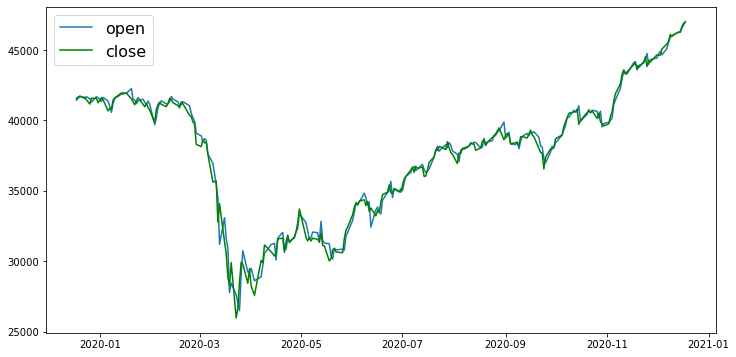

In [26]:
plt.figure(figsize=(12,6))
open_price, = plt.plot(data_f['open'])
close, = plt.plot(data_f['close'], color='green')
    
plt.legend(['open', 'close'], fontsize=16)
plt.show()

# Normalize The Data

In [27]:
avgs = data_f.mean()
devs = data_f.std()

In [28]:
for col in data_f.columns:
    data_f[col] = (data_f[col] - avgs.loc[col]) / devs.loc[col]

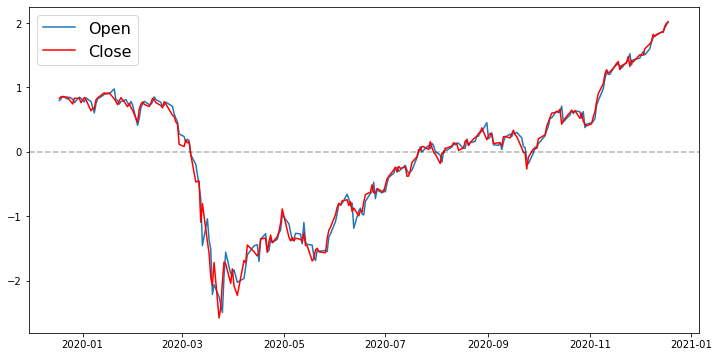

In [29]:
plt.figure(figsize=(12,6))
open_price, = plt.plot(data_f['open'])
close, = plt.plot(data_f['close'], color='red')

    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

plt.legend(['Open', 'Close'], fontsize=16)

# Taking First Difference to Remove Trend

In [30]:
data_f = data_f.diff().dropna()

In [31]:
data_f.head()

,open,high,low,close,adj close,volume,neg,neu,pos,compound
date,,,,,,,,,,
2019-12-19,0.028423,0.023687,0.020933,0.025258,0.025258,0.544112,0.000000,-2.156417,2.774161,2.477853
2019-12-20,0.038401,0.020549,0.038415,0.001668,0.001668,0.018137,0.000000,2.156417,-2.774161,-2.477853
2019-12-23,-0.043589,-0.024553,-0.034522,-0.008513,-0.008513,-1.656519,0.000000,0.000000,0.000000,0.000000
2019-12-24,0.030005,0.000308,-0.011017,-0.039720,-0.039720,-0.108822,0.000000,0.000000,0.000000,0.000000
2019-12-26,-0.030987,-0.036075,-0.062029,-0.065142,-0.065142,0.072548,1.470296,-1.088676,0.000000,-1.062882


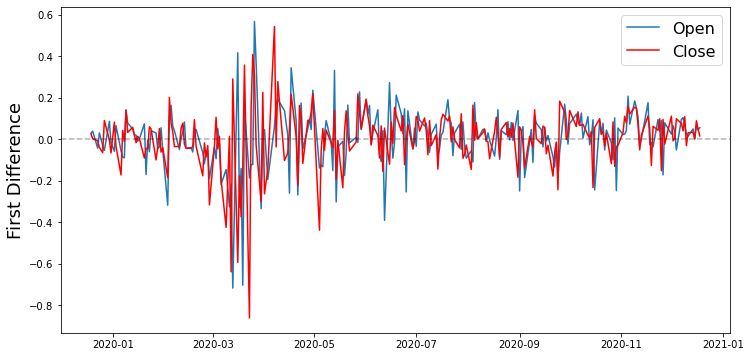

In [32]:
plt.figure(figsize=(12,6))
open_price, = plt.plot(data_f['open'])
close, = plt.plot(data_f['close'], color='red')
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Open', 'Close'], fontsize=16)

# Remove Increasing Volatility

In [33]:
annual_volatility = data_f.groupby(data_f.index.year).std()
list(annual_volatility.columns)

['open',
 'high',
 'low',
 'close',
 'adj close',
 'volume',
 'neg',
 'neu',
 'pos',
 'compound']

In [34]:
data_f['open_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'open'])
data_f['close_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'close'])
data_f['high_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'high'])
data_f['low_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'low'])
data_f['adj_close_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'adj close'])
data_f['volume_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'volume'])
data_f['neg_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'neg'])
data_f['neu_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'neu'])
data_f['pos_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'pos'])
data_f['compound_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'compound'])
data_f.head()

,open,high,low,close,adj close,volume,neg,neu,pos,compound,open_annual_vol,close_annual_vol,high_annual_vol,low_annual_vol,adj_close_annual_vol,volume_annual_vol,neg_annual_vol,neu_annual_vol,pos_annual_vol,compound_annual_vol
date,,,,,,,,,,,,,,,,,,,,
2019-12-19,0.028423,0.023687,0.020933,0.025258,0.025258,0.544112,0.000000,-2.156417,2.774161,2.477853,0.048517,0.05147,0.024674,0.042459,0.05147,0.643574,0.785906,1.291218,1.482852,1.441177
2019-12-20,0.038401,0.020549,0.038415,0.001668,0.001668,0.018137,0.000000,2.156417,-2.774161,-2.477853,0.048517,0.05147,0.024674,0.042459,0.05147,0.643574,0.785906,1.291218,1.482852,1.441177
2019-12-23,-0.043589,-0.024553,-0.034522,-0.008513,-0.008513,-1.656519,0.000000,0.000000,0.000000,0.000000,0.048517,0.05147,0.024674,0.042459,0.05147,0.643574,0.785906,1.291218,1.482852,1.441177
2019-12-24,0.030005,0.000308,-0.011017,-0.039720,-0.039720,-0.108822,0.000000,0.000000,0.000000,0.000000,0.048517,0.05147,0.024674,0.042459,0.05147,0.643574,0.785906,1.291218,1.482852,1.441177
2019-12-26,-0.030987,-0.036075,-0.062029,-0.065142,-0.065142,0.072548,1.470296,-1.088676,0.000000,-1.062882,0.048517,0.05147,0.024674,0.042459,0.05147,0.643574,0.785906,1.291218,1.482852,1.441177


In [35]:
data_f['open'] = data_f['open'] / data_f['open_annual_vol']
data_f['close'] = data_f['close'] / data_f['close_annual_vol']
data_f['high'] = data_f['high'] / data_f['high_annual_vol']
data_f['low'] = data_f['low'] / data_f['low_annual_vol']
data_f['adj close'] = data_f['adj close'] / data_f['adj_close_annual_vol']
data_f['volume'] = data_f['volume'] / data_f['volume_annual_vol']
data_f['neg'] = data_f['neg'] / data_f['neg_annual_vol']
data_f['neu'] = data_f['neu'] / data_f['neu_annual_vol']
data_f['pos'] = data_f['pos'] / data_f['pos_annual_vol']
data_f['compound'] = data_f['compound'] / data_f['compound_annual_vol']

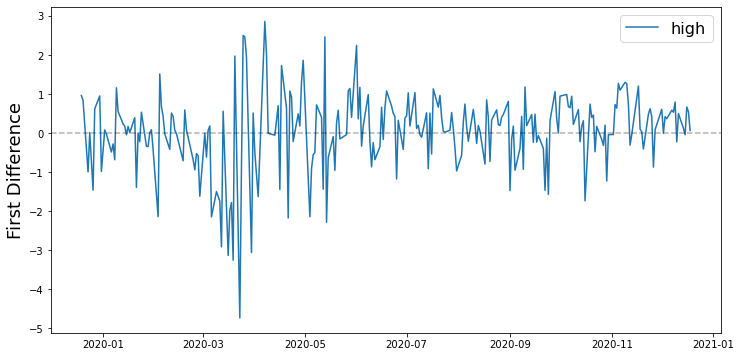

In [36]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(data_f['high'])
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['high'], fontsize=16)

# Removing Seasonality

In [37]:
month_avgs = data_f.groupby(data_f.index.month).mean()
month_avgs

,open,high,low,close,adj close,volume,neg,neu,pos,compound,open_annual_vol,close_annual_vol,high_annual_vol,low_annual_vol,adj_close_annual_vol,volume_annual_vol,neg_annual_vol,neu_annual_vol,pos_annual_vol,compound_annual_vol
date,,,,,,,,,,,,,,,,,,,,
1,-0.032128,-0.038760,-0.037660,-0.036110,-0.036110,0.012504,-4.037175e-17,-2.018587e-17,0.000000e+00,0.000000e+00,0.143606,0.146151,0.120397,0.132540,0.146151,1.296711,1.460934,1.445460,1.430132,1.444044
2,-0.166187,-0.204783,-0.208054,-0.191313,-0.191313,0.002945,0.000000e+00,-1.168656e-17,-1.168656e-17,2.337312e-17,0.143606,0.146151,0.120397,0.132540,0.146151,1.296711,1.460934,1.445460,1.430132,1.444044
3,-0.715075,-0.835104,-0.733639,-0.629873,-0.629873,0.030416,0.000000e+00,-4.121053e-02,5.358424e-02,3.797487e-02,0.143606,0.146151,0.120397,0.132540,0.146151,1.296711,1.460934,1.445460,1.430132,1.444044
4,0.348120,0.430472,0.420005,0.353670,0.353670,-0.013728,0.000000e+00,4.807895e-02,-6.251495e-02,-4.430401e-02,0.143606,0.146151,0.120397,0.132540,0.146151,1.296711,1.460934,1.445460,1.430132,1.444044
5,-0.108142,-0.139367,-0.129968,-0.101998,-0.101998,0.039262,0.000000e+00,1.168656e-17,2.337312e-17,0.000000e+00,0.143606,0.146151,0.120397,0.132540,0.146151,1.296711,1.460934,1.445460,1.430132,1.444044
6,0.217963,0.235585,0.219120,0.169685,0.169685,-0.039418,0.000000e+00,0.000000e+00,0.000000e+00,-1.009294e-17,0.143606,0.146151,0.120397,0.132540,0.146151,1.296711,1.460934,1.445460,1.430132,1.444044
7,0.178655,0.218016,0.183640,0.175296,0.175296,0.003446,4.827057e-18,-8.312576e-02,1.080848e-01,7.974722e-02,0.143606,0.146151,0.120397,0.132540,0.146151,1.296711,1.460934,1.445460,1.430132,1.444044
8,0.148986,0.189347,0.074051,0.072870,0.072870,0.017095,0.000000e+00,2.534706e-02,-3.295767e-02,-1.397116e-02,0.143606,0.146151,0.120397,0.132540,0.146151,1.296711,1.460934,1.445460,1.430132,1.444044
9,-0.126808,-0.151772,-0.041623,-0.038161,-0.038161,-0.020133,4.816508e-02,2.666379e-02,-8.153813e-02,-8.261283e-02,0.143606,0.146151,0.120397,0.132540,0.146151,1.296711,1.460934,1.445460,1.430132,1.444044


In [38]:
data_f['open_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'open'])
data_f['close_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'close'])
data_f['high_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'high'])
data_f['low_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'low'])
data_f['adj_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'adj close'])
data_f['volume_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'volume'])
data_f['neg_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'neg'])
data_f['neu_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'neu'])
data_f['pos_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'pos'])
data_f['compound_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'compound'])

In [39]:
data_f.head()

,open,high,low,close,adj close,volume,neg,neu,pos,compound,open_annual_vol,close_annual_vol,high_annual_vol,low_annual_vol,adj_close_annual_vol,volume_annual_vol,neg_annual_vol,neu_annual_vol,pos_annual_vol,compound_annual_vol,open_month_avg,close_month_avg,high_month_avg,low_month_avg,adj_month_avg,volume_month_avg,neg_month_avg,neu_month_avg,pos_month_avg,compound_month_avg
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-19,0.585848,0.960011,0.493027,0.490732,0.490732,0.845453,0.000000,-1.670065,1.870829,1.719325,0.048517,0.05147,0.024674,0.042459,0.05147,0.643574,0.785906,1.291218,1.482852,1.441177,0.222256,0.132481,0.221024,0.153403,0.132481,-0.11312,0.0,-0.049707,0.064631,0.046756
2019-12-20,0.791504,0.832820,0.904754,0.032405,0.032405,0.028182,0.000000,1.670065,-1.870829,-1.719325,0.048517,0.05147,0.024674,0.042459,0.05147,0.643574,0.785906,1.291218,1.482852,1.441177,0.222256,0.132481,0.221024,0.153403,0.132481,-0.11312,0.0,-0.049707,0.064631,0.046756
2019-12-23,-0.898436,-0.995100,-0.813071,-0.165400,-0.165400,-2.573935,0.000000,0.000000,0.000000,0.000000,0.048517,0.05147,0.024674,0.042459,0.05147,0.643574,0.785906,1.291218,1.482852,1.441177,0.222256,0.132481,0.221024,0.153403,0.132481,-0.11312,0.0,-0.049707,0.064631,0.046756
2019-12-24,0.618437,0.012486,-0.259473,-0.771710,-0.771710,-0.169091,0.000000,0.000000,0.000000,0.000000,0.048517,0.05147,0.024674,0.042459,0.05147,0.643574,0.785906,1.291218,1.482852,1.441177,0.222256,0.132481,0.221024,0.153403,0.132481,-0.11312,0.0,-0.049707,0.064631,0.046756
2019-12-26,-0.638685,-1.462064,-1.460908,-1.265633,-1.265633,0.112727,1.870829,-0.843139,0.000000,-0.737509,0.048517,0.05147,0.024674,0.042459,0.05147,0.643574,0.785906,1.291218,1.482852,1.441177,0.222256,0.132481,0.221024,0.153403,0.132481,-0.11312,0.0,-0.049707,0.064631,0.046756


In [40]:
data_f['open'] = data_f['open'] - data_f['open_month_avg']
data_f['close'] = data_f['close'] - data_f['close_month_avg']
data_f['high'] = data_f['high'] - data_f['high_month_avg']
data_f['low'] = data_f['low'] - data_f['low_month_avg']
data_f['adj close'] = data_f['adj close'] - data_f['adj_month_avg']
data_f['volume'] = data_f['volume'] - data_f['volume_month_avg']
data_f['neg'] = data_f['neg'] - data_f['neg_month_avg']
data_f['neu'] = data_f['neu'] - data_f['neu_month_avg']
data_f['pos'] = data_f['pos'] - data_f['pos_month_avg']
data_f['compound'] = data_f['compound'] - data_f['compound_month_avg']

In [41]:
data_f.head()

,open,high,low,close,adj close,volume,neg,neu,pos,compound,open_annual_vol,close_annual_vol,high_annual_vol,low_annual_vol,adj_close_annual_vol,volume_annual_vol,neg_annual_vol,neu_annual_vol,pos_annual_vol,compound_annual_vol,open_month_avg,close_month_avg,high_month_avg,low_month_avg,adj_month_avg,volume_month_avg,neg_month_avg,neu_month_avg,pos_month_avg,compound_month_avg
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-19,0.363592,0.738987,0.339623,0.358251,0.358251,0.958574,0.000000,-1.620358,1.806197,1.672569,0.048517,0.05147,0.024674,0.042459,0.05147,0.643574,0.785906,1.291218,1.482852,1.441177,0.222256,0.132481,0.221024,0.153403,0.132481,-0.11312,0.0,-0.049707,0.064631,0.046756
2019-12-20,0.569247,0.611796,0.751351,-0.100076,-0.100076,0.141302,0.000000,1.719771,-1.935460,-1.766081,0.048517,0.05147,0.024674,0.042459,0.05147,0.643574,0.785906,1.291218,1.482852,1.441177,0.222256,0.132481,0.221024,0.153403,0.132481,-0.11312,0.0,-0.049707,0.064631,0.046756
2019-12-23,-1.120692,-1.216125,-0.966474,-0.297881,-0.297881,-2.460815,0.000000,0.049707,-0.064631,-0.046756,0.048517,0.05147,0.024674,0.042459,0.05147,0.643574,0.785906,1.291218,1.482852,1.441177,0.222256,0.132481,0.221024,0.153403,0.132481,-0.11312,0.0,-0.049707,0.064631,0.046756
2019-12-24,0.396181,-0.208538,-0.412876,-0.904191,-0.904191,-0.055970,0.000000,0.049707,-0.064631,-0.046756,0.048517,0.05147,0.024674,0.042459,0.05147,0.643574,0.785906,1.291218,1.482852,1.441177,0.222256,0.132481,0.221024,0.153403,0.132481,-0.11312,0.0,-0.049707,0.064631,0.046756
2019-12-26,-0.860941,-1.683088,-1.614311,-1.398114,-1.398114,0.225847,1.870829,-0.793433,-0.064631,-0.784265,0.048517,0.05147,0.024674,0.042459,0.05147,0.643574,0.785906,1.291218,1.482852,1.441177,0.222256,0.132481,0.221024,0.153403,0.132481,-0.11312,0.0,-0.049707,0.064631,0.046756


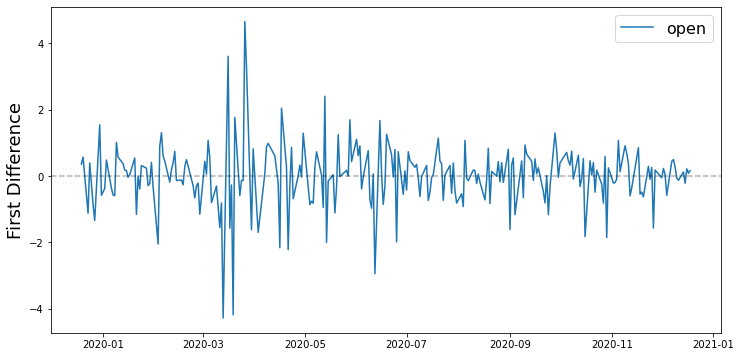

In [42]:
plt.figure(figsize=(12,6))
open_price, = plt.plot(data_f['open'])

plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['open'], fontsize=16)

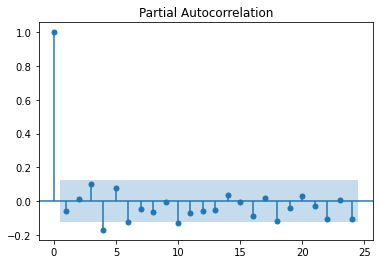

In [43]:
plot_pacf(data_f['high'])
plt.show()

# Fitting a VAR Model

In [44]:
data_f1 = data_f.loc[:,['open' ,'close', 'high', 'low', 'adj close' ,'volume','neg', 'neu' ,'pos' ,'compound']]

data_f2 = data_f1.dropna()
data_f2.isnull().sum()

open         0
close        0
high         0
low          0
adj close    0
volume       0
neg          0
neu          0
pos          0
compound     0
dtype: int64

In [45]:
model = VAR(data_f2)

model_fit = model.fit(maxlags =2)


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [46]:
model_fit.summary()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:1450: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:1472: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.stderr


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 20, Dec, 2020
Time:                     14:39:49
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                   -49.5775
Nobs:                     247.000    HQIC:                  -51.3599
Log likelihood:           3196.53    FPE:                1.49536e-23
AIC:                     -52.5612    Det(Omega_mle):         0.00000
--------------------------------------------------------------------
Results for equation open
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               -0.002951         0.041488           -0.071           0.943
L1.open             -0.462062         0.172722           -2.675           0.007
L1.close             0.481595              NAN              NAN  